In [1]:
path = r"C:\Users\datta\Desktop\intern"
import open3d as o3d
#from open3d.open3d_pybind.geometry import create_rgbd_image_from_color_and_depth

In [2]:
color_raw = o3d.io.read_image(path+r"\rgb.png")
depth_raw = o3d.io.read_image(path+r"\pred.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 320x240, with 1 channels.
Depth image : 320x240, with 1 channels.
Use numpy.asarray to access buffer data.


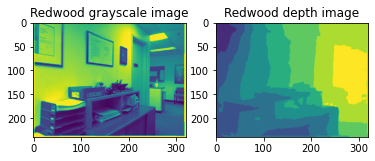

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [9]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
        rgbd_image,
        o3d.camera.PinholeCameraIntrinsic(
            o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [10]:
import numpy as np
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [11]:
o3d.io.write_point_cloud("pointexmp.ply", pcd)

True

In [12]:
import open3d as o3d
import numpy as np
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("pointexmp.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

Load a ply point cloud, print it, and render it
geometry::PointCloud with 76800 points.
[[-1.67058823e-05  1.25228758e-05 -2.74509803e-05]
 [-1.42745099e-05  1.07338936e-05 -2.35294119e-05]
 [-1.42296920e-05  1.07338936e-05 -2.35294119e-05]
 ...
 [-1.86741367e-07  3.73482735e-08 -3.92156871e-05]
 [-1.12044820e-07  3.73482735e-08 -3.92156871e-05]
 [-4.10831022e-08  4.10831022e-08 -4.31372573e-05]]


In [ ]:
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

In [27]:
mesh = o3d.io.read_triangle_mesh("pointexmp.ply")
print(mesh)
o3d.io.write_triangle_mesh("copy_of_knot.ply", mesh)

[Open3D WARNING] geometry::TriangleMesh appears to be a geometry::PointCloud (only contains vertices, but no triangles).
geometry::TriangleMesh with 275999 points and 0 triangles.


True

In [28]:
poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(downpcd, depth=8, width=0, scale=1.1, linear_fit=False)[0]

In [30]:
bbox = downpcd.get_axis_aligned_bounding_box()
p_mesh_crop = poisson_mesh.crop(bbox)

In [33]:
o3d.io.write_triangle_mesh("p_mesh.ply", poisson_mesh)

True

In [49]:
import numpy as np
points=np.load('pointcloud_2048.npy')
print(points)

[[-0.092589    0.03470492  0.09088563]
 [ 0.029333   -0.10365419 -0.41584431]
 [ 0.09439382 -0.3564636  -0.03984766]
 ...
 [ 0.08745641 -0.36006823 -0.0680098 ]
 [ 0.07707477 -0.00622912 -0.18158554]
 [ 0.06877977  0.00064806 -0.29733367]]


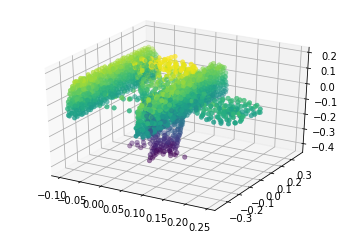

In [50]:
#np.meshgrid(points, sparse=True)
from scipy import spatial
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
x= points[:,0]
y= points[:,1]
z= points[:,2]
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
#plt.triplot3(points[:,0], points[:,1],points[:,2], tri.simplices)
plt.show()

C:\Users\datta\AppData\Local\Continuum\anaconda3\envs\TF2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


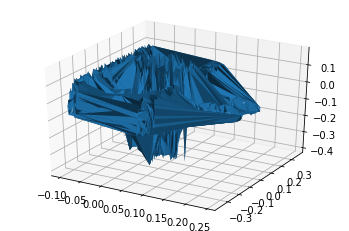

In [11]:
from numpy import load, stack
from matplotlib.pyplot import subplots
from mpl_toolkits.mplot3d import Axes3D
from scipy import spatial
import matplotlib.pyplot as plt
points = np.load('pointcloud_2048.npy')
%matplotlib inline
v = spatial.ConvexHull(points)
fig, ax = subplots(subplot_kw = dict(projection = '3d'))
ax.plot_trisurf(*v.points.T, triangles = v.simplices.T)
fig.show()